In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

from matplotlib import animation

%matplotlib inline

Using TensorFlow backend.


In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 9

In [3]:
np.random.seed(12)

In [4]:
def function(x):
    return abs(math.sin(x))**(1/2)

In [59]:
X = np.linspace(-4,4,400)
y = np.array(list(map(function,X)))

x_train = np.array([X[i] for i in range(0,len(X),2)])
y_train = np.array([y[i] for i in range(0,len(y),2)])

x_test = np.array([X[i] for i in range(0,len(X),5)])
y_test = np.array([y[i] for i in range(0,len(y),5)])

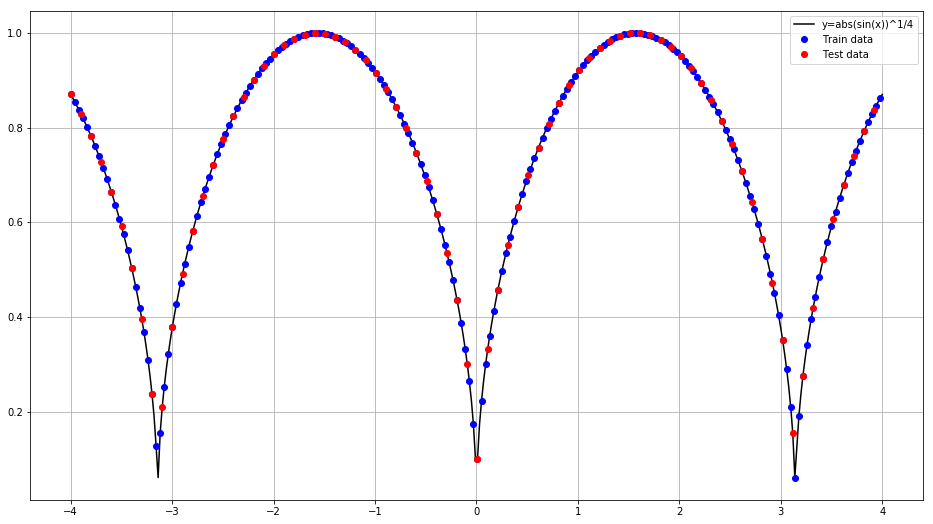

In [60]:
plt.plot(X,y, label='y=abs(sin(x))^1/4', color='#000000')
plt.plot(x_train,y_train,'o',color='#0000FF',label='Train data')
plt.plot(x_test,y_test,'o',color='#FF0000',label='Test data', linewidth=6)
plt.grid()
plt.legend()
plt.show()

In [61]:
activation = 'selu'
epochs_number = 20
optimizer = Adam(lr=0.0001)

In [62]:
model = Sequential()

model.add(Dense(40, input_dim=1, activation=activation, kernel_initializer='he_normal'))
model.add(Dense(40, input_dim=1, activation=activation, kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mae', optimizer=optimizer)

In [63]:
loss = {'loss':[], 'val_loss':[]}
learn_predictions = []

for epoch in range(epochs_number): 

    print('Epoch: {0}'.format(epoch*10))

    hist = model.fit(x_train, y_train, batch_size=10, epochs=10, verbose=2, validation_data=(x_test,y_test))

    loss['loss'].extend(hist.history['loss'])
    loss['val_loss'].extend(hist.history['val_loss'])
    learn_predictions.append(model.predict(X))

model.save('model {0}.h5'.format('with 2 layers'))    

Epoch: 0
Train on 200 samples, validate on 80 samples
Epoch 1/10
1s - loss: 5.5176 - val_loss: 5.1065
Epoch 2/10
0s - loss: 4.7582 - val_loss: 4.3113
Epoch 3/10
0s - loss: 3.9683 - val_loss: 3.5405
Epoch 4/10
0s - loss: 3.1886 - val_loss: 2.7686
Epoch 5/10
0s - loss: 2.4129 - val_loss: 1.9735
Epoch 6/10
0s - loss: 1.6063 - val_loss: 1.1944
Epoch 7/10
0s - loss: 0.9768 - val_loss: 0.8314
Epoch 8/10
0s - loss: 0.7241 - val_loss: 0.6033
Epoch 9/10
0s - loss: 0.4983 - val_loss: 0.3761
Epoch 10/10
0s - loss: 0.3035 - val_loss: 0.2496
Epoch: 10
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 0.2423 - val_loss: 0.2312
Epoch 2/10
0s - loss: 0.2255 - val_loss: 0.2193
Epoch 3/10
0s - loss: 0.2161 - val_loss: 0.2116
Epoch 4/10
0s - loss: 0.2055 - val_loss: 0.1984
Epoch 5/10
0s - loss: 0.1972 - val_loss: 0.1892
Epoch 6/10
0s - loss: 0.1858 - val_loss: 0.1808
Epoch 7/10
0s - loss: 0.1785 - val_loss: 0.1741
Epoch 8/10
0s - loss: 0.1712 - val_loss: 0.1664
Epoch 9/10
0s - loss: 0.16

0s - loss: 0.0850 - val_loss: 0.0910
Epoch 4/10
0s - loss: 0.0909 - val_loss: 0.0838
Epoch 5/10
0s - loss: 0.0872 - val_loss: 0.0901
Epoch 6/10
0s - loss: 0.0855 - val_loss: 0.0864
Epoch 7/10
0s - loss: 0.0853 - val_loss: 0.0886
Epoch 8/10
0s - loss: 0.0855 - val_loss: 0.0811
Epoch 9/10
0s - loss: 0.0833 - val_loss: 0.0829
Epoch 10/10
0s - loss: 0.0849 - val_loss: 0.0849
Epoch: 160
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 0.0837 - val_loss: 0.0807
Epoch 2/10
0s - loss: 0.0829 - val_loss: 0.0805
Epoch 3/10
0s - loss: 0.0844 - val_loss: 0.0819
Epoch 4/10
0s - loss: 0.0839 - val_loss: 0.0806
Epoch 5/10
0s - loss: 0.0848 - val_loss: 0.0835
Epoch 6/10
0s - loss: 0.0838 - val_loss: 0.0828
Epoch 7/10
0s - loss: 0.0842 - val_loss: 0.0827
Epoch 8/10
0s - loss: 0.0815 - val_loss: 0.0832
Epoch 9/10
0s - loss: 0.0831 - val_loss: 0.0804
Epoch 10/10
0s - loss: 0.0817 - val_loss: 0.0803
Epoch: 170
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 0.0828 - va

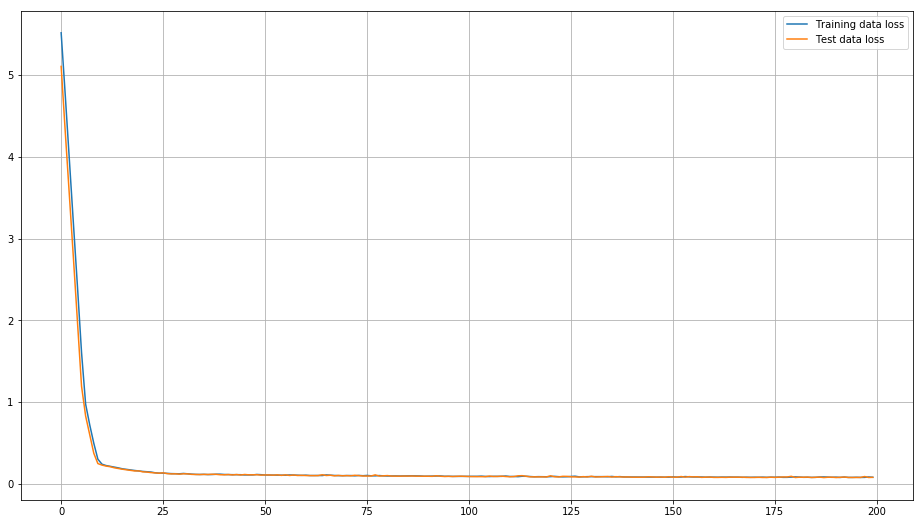

In [64]:
plt.plot(loss['loss'], label='Training data loss')
plt.plot(loss['val_loss'], label='Test data loss')
plt.grid()
plt.legend()
plt.show()

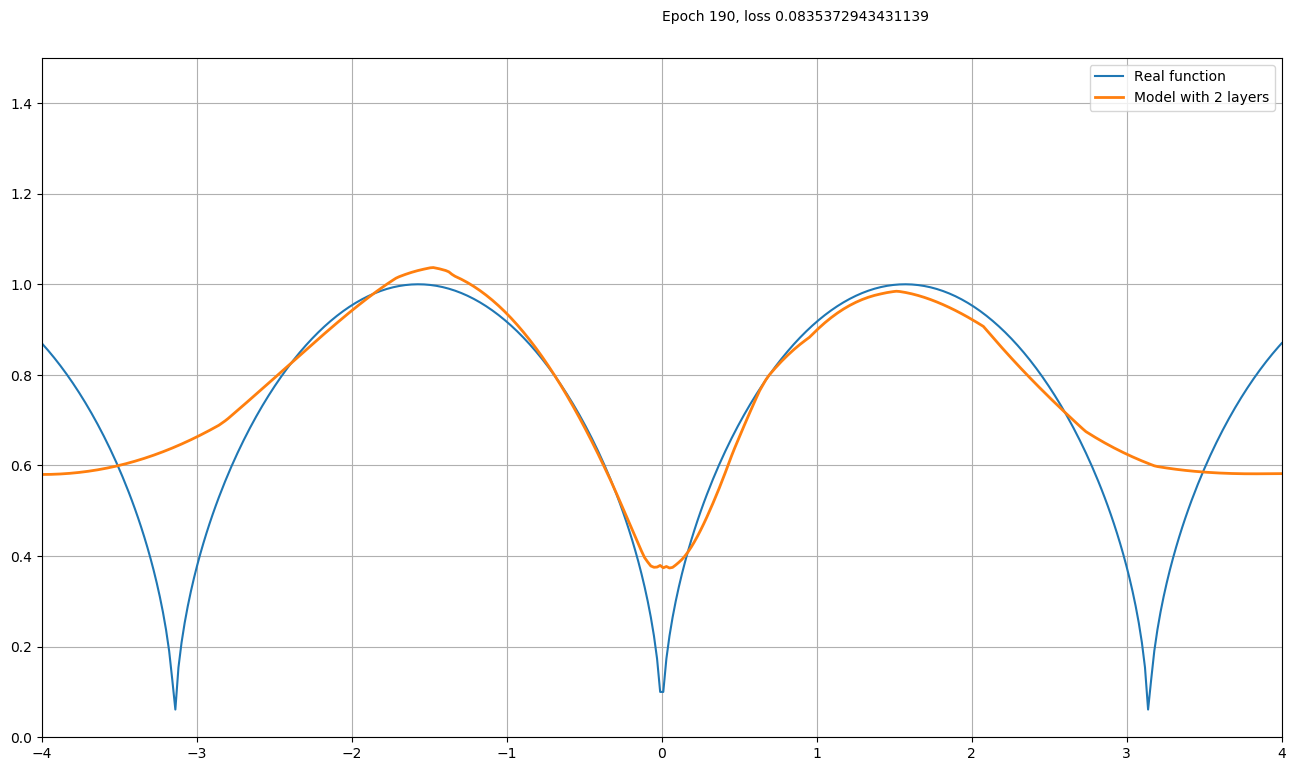

In [65]:
fig = plt.figure(dpi=100)
ax = plt.axes(xlim=(-4, 4), ylim=(0, 1.5))
ax.grid()

ttl = ax.text(0.5, 1.05, '', transform = ax.transAxes, va='bottom')
ax.plot(X, y, label='Real function')
line, = ax.plot([], [], lw=2)
line.set_label('Model with 2 layers')

def init():
    ttl.set_text('')
    line.set_data(X, learn_predictions[0])
    return line, ttl

def animate(i):
    ttl.set_text("Epoch {0}, loss {1}".format(i*10, loss['loss'][i*10]))
    x = X
    y = learn_predictions[i]
    line.set_data(x, y)
    return line, ttl

ax.legend()

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=20, interval=150, blit=True)

anim.save('Model_with_2_layers.gif', 
          dpi=100, writer='imagemagick')

# Conclusion:
Nice, now NN try to predict my function better